In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Week 9 Practical

### Q 1
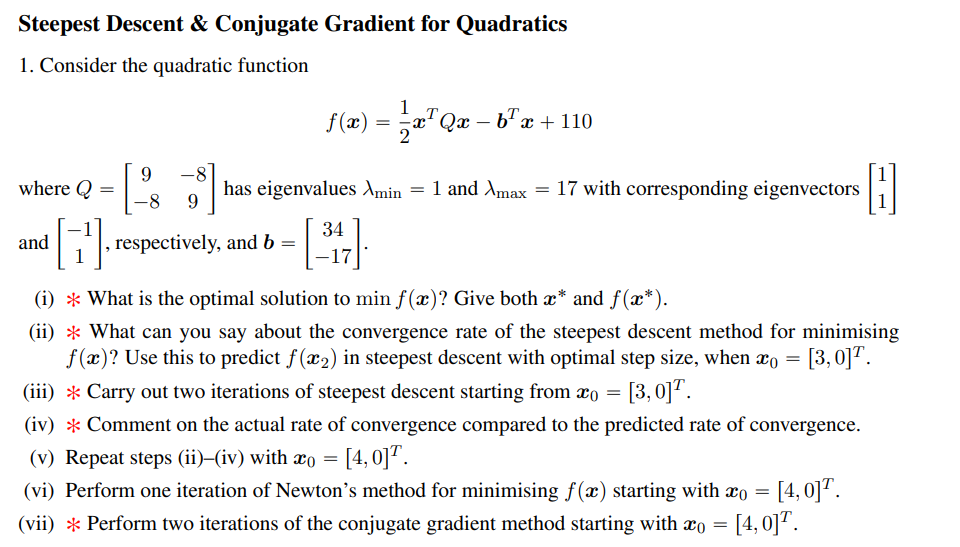

In [2]:
b = np.array([34,-17])
b = b.reshape(2,1)
Q = np.array([[9, -8], [-8, 9]])


def f(x):
    return 1/2*(x.T)@Q@(x) - b.T@(x) + 110


def Fx(xk,xopt):
    return f(xk) - f(xopt)

#### i)

In [3]:
xopt = np.linalg.inv(Q)@b
xopt = xopt.reshape(2,1)
print(xopt, f(xopt)[0])


[[10.]
 [ 7.]] [-0.5]


#### ii)
$$ p = \left (\frac{\lambda_{max}- \lambda_{min}}{\lambda_{max}+ \lambda_{min}} \right )^2 = 0.79$$
The covergance rate $P$ is not great however depending on the initial guess it might converge. Using $x_0 = \left (\begin{matrix}  3 \\ 0\end{matrix} \right )$, the routine converges in 1 iteration.

In [4]:

x0 = np.array([3,0])
x0 = x0.reshape(2,1)
d = (-(Q@x0 - b)).reshape(2,1)
a0 = ((d.T@d)/(d.T@Q@d))[0][0]
x1 = x0 + a0 * d
print(x1)

[[10.]
 [ 7.]]


In [32]:

convegance_ratio = []
x0 = np.array([4,0])
x0 = x0.reshape(2,1)
xk = x0
xk_1 = np.array([1000,1000]).reshape(2,1)
xarr = [x0]

for j in range(30):
    d = (-(Q@xk - b)).reshape(2,1)
    a0 = ((d.T@d)/(d.T@Q@d))[0][0]
    xk_1 = xk + a0*d
    xarr.append(xk_1)
    xk = xk_1

xarr= np.array(xarr).squeeze()
print(xarr.shape)

(31, 2)


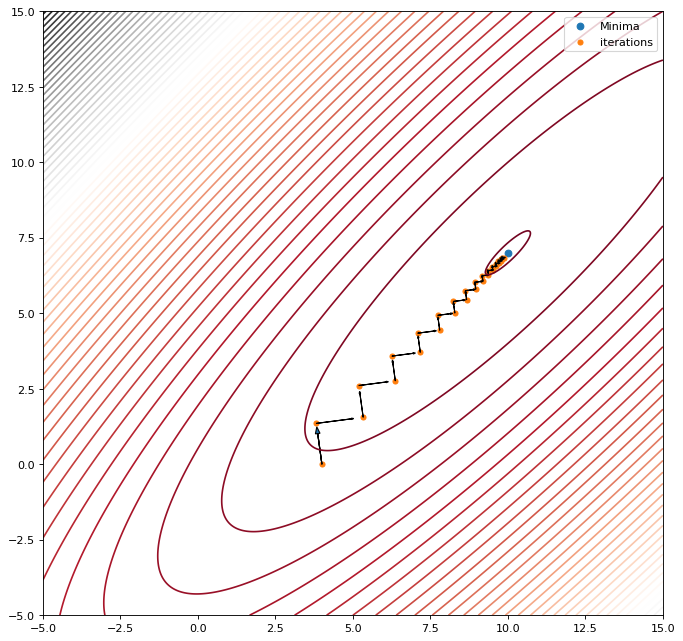

In [6]:
u = np.linspace(-5,15, 1000)
x, y = np.meshgrid(u,u)
z = 1/2*(9*x**2 - 8*x*y*2+9*y**2) - 34*x + 17*y + 110
plt.figure(figsize=(10,10), dpi = 80)
plt.contour(x,y,z, 60, cmap = "RdGy")
plt.scatter(xopt[0],xopt[1])
plt.scatter(xarr[:,0], xarr[:,1], s = 20)
for i in range(xarr[:,0].shape[0]-1):
    plt.arrow(xarr[i,0], xarr[i,1], (xarr[i+1,0] -xarr[i,0] )*0.75,(xarr[i+1,1] -xarr[i,1] )*0.75, head_width=0.05)
plt.arrow(xarr[0,0], xarr[0,1], (xarr[1,0] -xarr[0,0] )*0.75,(xarr[1,1] -xarr[0,1] )*0.75, head_width=0.15)
plt.legend(["Minima",  "iterations"])
plt.savefig("ters1.pdf")


### iv)
The actual covnergance $p_{actual} = 0.778 < 0.79$

In [7]:
actual_convergance = np.array([ Fx(xarr[i+1,:],xopt)/Fx(xarr[i,:],xopt) for i in range(xarr.shape[0]-1)]).ravel()

In [8]:
np.average(actual_convergance)

0.7780866901101025

### v) Using Newton's Method.

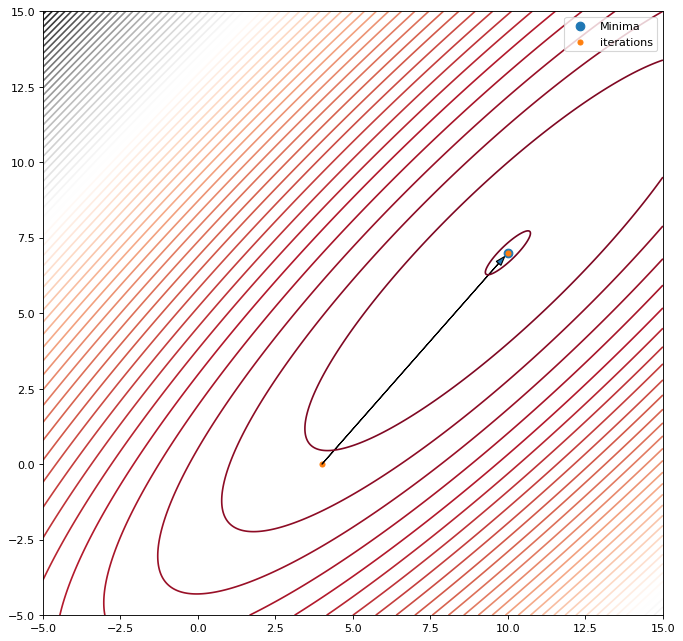

In [37]:
xk = x0
xk1 = x0
xarr2 = [x0]
while np.linalg.norm(Q@xk -b) > 1e-10:
    # Hf = Q.T + Q
    # gradf = (Q@xk - b).reshape(2,1)
    # xk1 = xk - np.linalg.inv(Hf)@gradf
    # xarr2.append(xk1)
    # xk = xk1
    d =np.linalg.inv(Q)@(Q@xk -b)
    al = (-(Q@xk -b).T @ d)/(d.T@Q@d)
    xk1 = xk + al*d
    xarr2.append(xk1)
    xk = xk1 

xarr2= np.array(xarr2).squeeze()

u = np.linspace(-5,15, 1000)
x, y = np.meshgrid(u,u)
z = 1/2*(9*x**2 - 8*x*y*2+9*y**2) - 34*x + 17*y + 110
plt.figure(figsize=(10,10), dpi = 80)
plt.contour(x,y,z, 60, cmap = "RdGy")
plt.scatter(xopt[0],xopt[1], s= 60)
plt.scatter(xarr2[:,0], xarr2[:,1], s = 20)
for i in range(xarr2[:,0].shape[0]-1):
    plt.arrow(xarr2[i,0], xarr2[i,1], (xarr2[i+1,0] -xarr2[i,0] )*0.95,(xarr2[i+1,1] -xarr2[i,1] )*0.95, head_width=0.2)
plt.legend(["Minima",  "iterations"])
plt.savefig("ters2.pdf")  


### Applying Conjugate Method

In [59]:
x0 = np.array([4,0])
x0 = x0.reshape(2,1)
xk = x0
xarr3 = [x0]
d = -((Q@xk - b)).reshape(2,1)
grdf = d
while np.linalg.norm(d) >= 1e-10:
    a0 = ((grdf.T@grdf)/(d.T@Q@d))[0][0]
    xk_1 = xk + a0*d
    gradfk = (Q@xk_1 - b).reshape(2,1)
    bta = ((gradfk.T@Q@d)/(d.T@Q@d))[0][0]
    print(bta)
    dk = -gradfk + bta*d
    xarr3.append(xk_1)
    xk = xk_1
    d = dk
    grdf = gradfk

xarr3= np.array(xarr3).squeeze()


0.484122415216115
0.0


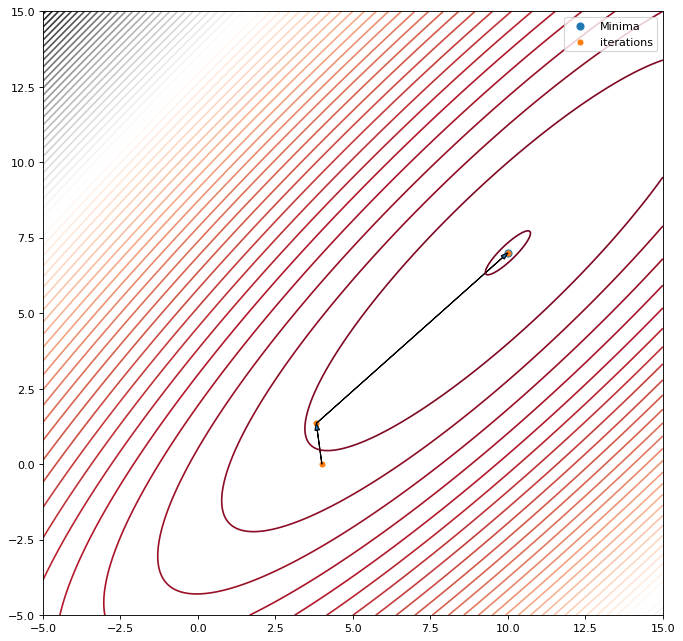

In [66]:
u = np.linspace(-5,15, 1000)
x, y = np.meshgrid(u,u)
z = 1/2*(9*x**2 - 8*x*y*2+9*y**2) - 34*x + 17*y + 110
plt.figure(figsize=(10,10), dpi = 80)
plt.contour(x,y,z, 60, cmap = "RdGy")
plt.scatter(xopt[0],xopt[1], s = 40)
plt.scatter(xarr3[:,0], xarr3[:,1], s = 20)
for i in range(xarr3[:,0].shape[0]-1):
    plt.arrow(xarr3[i,0], xarr3[i,1], xarr3[i+1,0] -xarr3[i,0]  ,xarr3[i+1,1] -xarr3[i,1], head_width=0.15 , length_includes_head = True)
plt.legend(["Minima",  "iterations"])
plt.savefig("ters3.pdf")

## Q 2
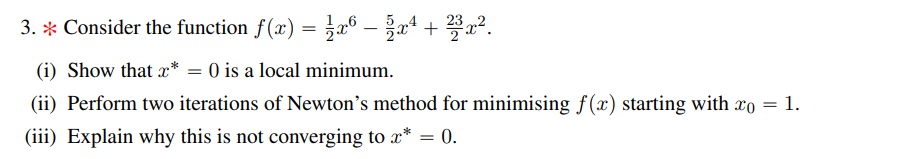

In [12]:
def fx(x):
    return 1/2*x**6-5/2*x**4+23/2*x**2


def dfx(x):
    return 3*x**5-10*x**3+23*x

In [14]:
xiters = []
x0 = 1
while dfx(x0) >= 1e-10:
    xk = x0 - fx(x0)/dfx(x0)
    xiters.append(xk)
    x0 = xk

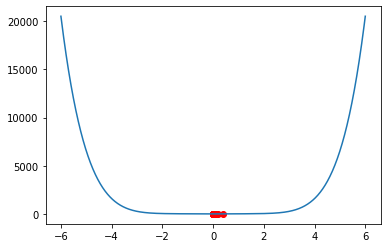

In [21]:
plt.figure()
x = np.linspace(-6,6,1000)
plt.plot(x, fx(x))
plt.scatter(xiters,[fx(i) for i in xiters], color = 'red')
plt.show()